In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
import os

# This will print ALL files and folders in your input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print("   ", filename)

/kaggle/input
/kaggle/input/gene-expression-cancer-rna-seq
/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531
/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531
    data.csv
    labels.csv


In [53]:
data_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/labels.csv"

X_full = pd.read_csv(data_path)
y_raw = pd.read_csv(labels_path)['Class']

X = X_full.drop(columns=['Unnamed: 0'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels to numbers (0–4)
le = LabelEncoder()
y = le.fit_transform(y_raw)

print("Classes:", le.classes_)
print("Train/test split")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Classes: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
Train/test split


In [54]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Input: 20531 genes
model.add(Dense(64, activation='relu'))                                    # Hidden layer 2
model.add(Dense(len(le.classes_), activation='softmax'))                   # Output: 5 classes

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │     2,628,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,636,677 (10.06 MB)

 Trainable params: 2,636,677 (10.06 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(
    X_train, y_train,
    epochs=30,               # Not too many - data is good
    batch_size=32,
    validation_split=0.2,    # 20% of train for validation
    verbose=1
)

print("Training done")

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7968 - loss: 0.4993 - val_accuracy: 0.9922 - val_loss: 0.1054
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 5.0083e-04 - val_accuracy: 0.9844 - val_loss: 0.2055
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9995 - loss: 0.0011 - val_accuracy: 0.9922 - val_loss: 0.0660
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 8.7119e-08 - val_accuracy: 0.9922 - val_loss: 0.0279
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 6.0356e-08 - val_accuracy: 0.9922 - val_loss: 0.0214
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 7.1827e-08 - val_accuracy: 0.9922 - val_loss: 0.0202
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 6.1530e-08 - val_accuracy: 0.9922 - val_loss: 0.0199
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 5.5328e-08 - 

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9699 - loss: 0.5306      
Test Accuracy: 0.9689
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
F1-score: 0.9686


<Figure size 800x600 with 0 Axes>

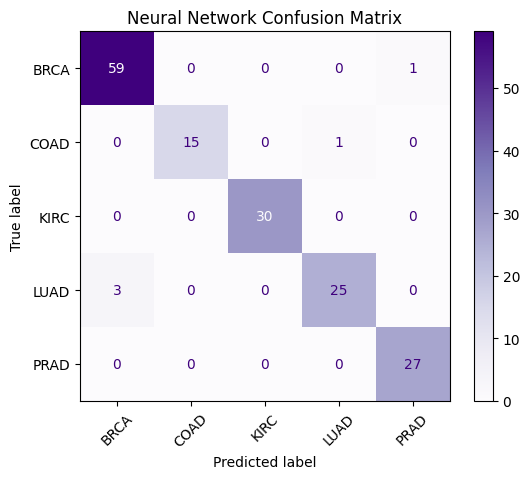

In [57]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title("Neural Network Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

## Simple Neural Network (TensorFlow/Keras)

Architecture:
Input (20531 genes) → 128 (ReLU) → 64 (ReLU) → 5 (Softmax)  
~2.6 million trainable parameters

Training setup:
- Optimizer: Adam
- Loss: Sparse categorical cross-entropy
- Epochs: 30
- Batch size: 32
- Validation split: 20% of training data

Results (Test set):
- Test Accuracy: ~96.9%
- F1-score (weighted): ~0.97

The neural network achieved very strong performance, but slightly lower than the linear models.
This suggests mild overfitting due to the extremely high dimensionality and relatively small number of samples.

Even a simple feed-forward ANN performs very well on this dataset, confirming that gene expression
patterns are highly separable across cancer types.
